In [142]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import norm, skew 
from scipy import stats
from datetime import datetime
import scipy.stats
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('walmart.csv')
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


<AxesSubplot:>

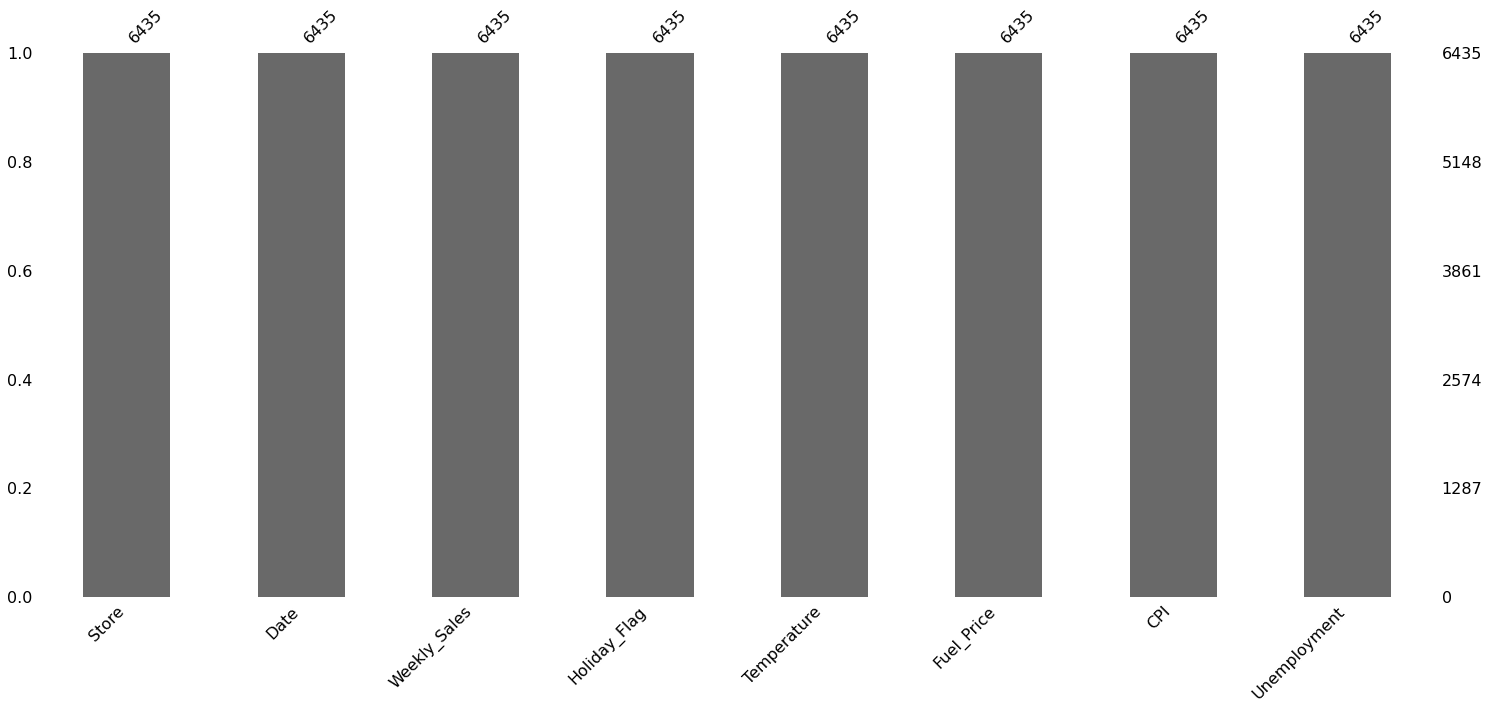

In [3]:
# NAN VISUALIZATION
msno.bar(df)
## THUS THERE ARE NO NAN VALUES BY THE GRAPH VISUALIZATION

In [4]:
# THERE ARE 2 CATEGORICAL COLUMNS AND 6 NON CATEGORICAL COLUMNS
# STORE AND HOLIDAYS

df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.describe()
## Temperature values looks litte bit fishy

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Text(0.5, 1.0, 'Unemployment')

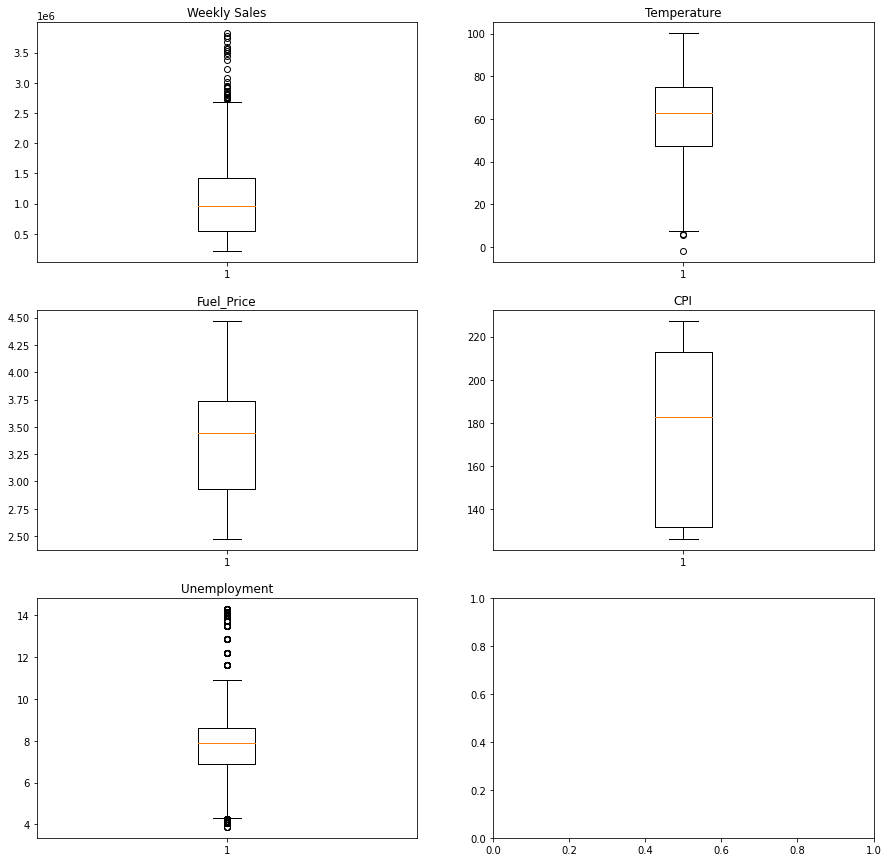

In [7]:
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs[0,0].boxplot(df['Weekly_Sales'])
axs[0,0].set_title('Weekly Sales')
axs[0,1].boxplot(df['Temperature'])
axs[0,1].set_title('Temperature')
axs[1,0].boxplot(df['Fuel_Price'])
axs[1,0].set_title('Fuel_Price')
axs[1,1].boxplot(df['CPI'])
axs[1,1].set_title('CPI')
axs[2,0].boxplot(df['Unemployment'])
axs[2,0].set_title('Unemployment')

In [8]:
##Temperature and unemployement have some outliers
## there are outliers in weekly sales too, but it is explained by holiday peak sales

In [9]:
# REPLACING OUTLIERS OF TEMPERATURE WITH AVERAGE (BEFORE AND AFTER VALUE)
Q1,Q3= df['Temperature'].quantile(0.25),df['Temperature'].quantile(0.75),
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
for i in df['Temperature']:
    if i>upper_bound or i<lower_bound:
        id1=df[df['Temperature']==i][:1].index-1
        id2=df[df['Temperature']==i][:1].index+1
        before_value=df.iloc[id1]['Temperature'].values[0]
        after_value=df.iloc[id2]['Temperature'].values[0]
        df['Temperature'].replace(i,(before_value+after_value)/2,inplace=True)


In [10]:
# REPLACINNG OUTLIERS OF EMPLOYEMENT WITH MEAN
Q1,Q3= df['Unemployment'].quantile(0.25),df['Unemployment'].quantile(0.75),
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
for i in df['Unemployment']:
    if i>upper_bound or i<lower_bound:
        df['Unemployment'].replace(i,df['Unemployment'].mean(),inplace=True)

skewness of unemployement -0.12416247265866173
mean is 7.728662872620826 and standard deviation is 1.1958054336587187


C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Unemployement distribution (Original)')

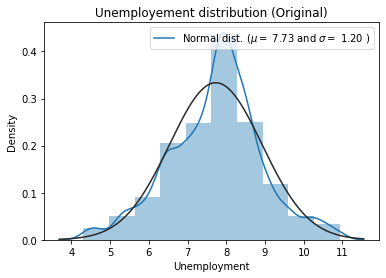

In [11]:
sns.distplot(df['Unemployment'],fit=norm,bins=10);
print('skewness of unemployement',skew(df['Unemployment']))
(mean,standard_deviation) = norm.fit(df['Unemployment'])
print('mean is',mean,'and standard deviation is',standard_deviation)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, standard_deviation)],
            loc = 'best')
plt.title('Unemployement distribution (Original)')
## UNEMPLOYEMENT IS CLOSE TO NORMAL DISTRIBUTION
## SO WE CAN USE MEAN AS OUTLIER REPLACEMENT

In [12]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.9,0,42.31,2.572,211.096358,8.106


C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness of Weekly_Sales 0.6682059921068103
mean is 1046964.8775617715 and standard deviation is 564322.7690195543


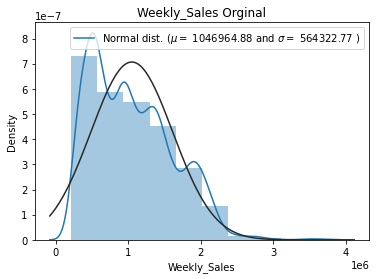

C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness of Temperature -0.331824636250604
mean is 60.66863403263403 and standard deviation is 18.429745952904533


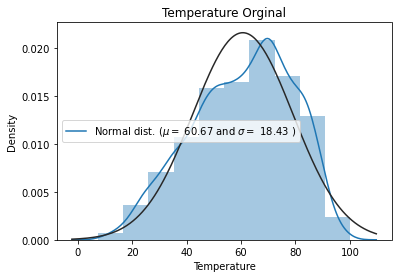

skewness of Fuel_Price -0.09613588414498364
mean is 3.358606837606838 and standard deviation is 0.4589840399402098


C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


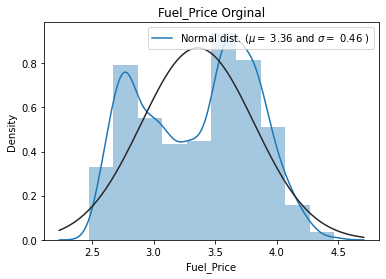

C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness of CPI 0.06347704896208373
mean is 171.57839384878014 and standard deviation is 39.35365415724738


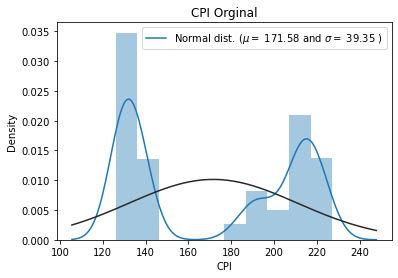

C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness of Unemployment -0.12416247265866173
mean is 7.728662872620826 and standard deviation is 1.1958054336587187


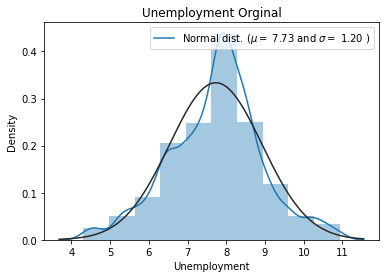

In [13]:
## CHECKING SKEWNESS
cols=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
for i in cols:
    sns.distplot(df[i],bins=10,fit=norm);
    print(f'skewness of {i}',skew(df[i]))
    (mean,standard_deviation) = norm.fit(df[i])
    print('mean is',mean,'and standard deviation is',standard_deviation)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, standard_deviation)],
                loc = 'best')
    plt.title(f'{i} Orginal')
    plt.show()

Text(0.5, 1.0, 'Unemployment')

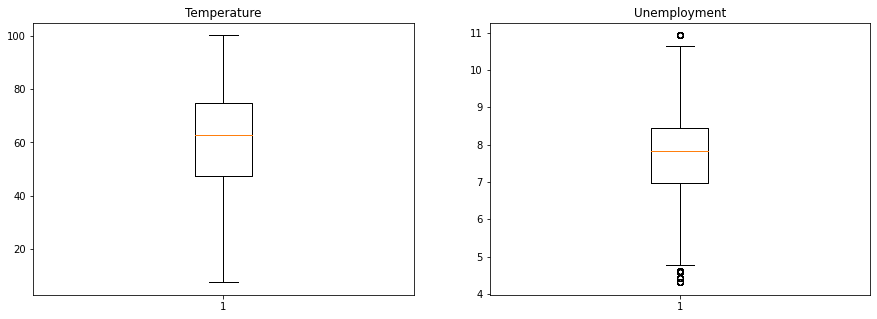

In [14]:
# REMOVED MOST OF THE OUTLIERS FROM TEMPERATURE AND UNEMPLOYMENT 
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(15,5))
ax1.boxplot(df['Temperature'])
ax1.set_title('Temperature')
ax2.boxplot(df['Unemployment'])
ax2.set_title('Unemployment')
#NO OUTLIERS

In [15]:
## EXPLORATION
#figure(figsize=(15,5), dpi=80)
Total_holiday_sales=df[df['Holiday_Flag']==1]['Weekly_Sales'].mean()
Total_non_holiday_sales=df[df['Holiday_Flag']==0]['Weekly_Sales'].mean()

In [16]:
data = {'Avg Weekly Holiday sales':Total_holiday_sales, 'Avg_non_weekly_holiday_sales':Total_non_holiday_sales}

Text(0.5, 1.0, 'Holiday vs Non Holiday (Average)')

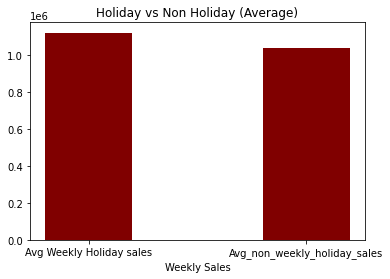

In [17]:
plt.bar(list(data.keys()), list(data.values()), color ='maroon',
        width = 0.4)
plt.xlabel('Weekly Sales')
plt.title('Holiday vs Non Holiday (Average)')
# The holiday weeks has more sales compared to non-weekly

Text(0.5, 1.0, 'Store number vs weekly sales')

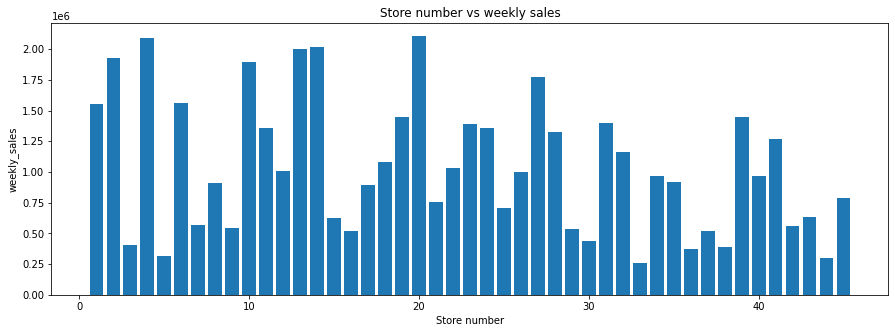

In [18]:
store_sales=[]
store_no=[]
for i in df['Store'].unique():
    store_sales.append(df[df['Store']==i]['Weekly_Sales'].mean())
    store_no.append(i)
fig, ax1 = plt.subplots(1,1, figsize=(15,5))

plt.bar(store_no,store_sales)
plt.xlabel('Store number')
plt.ylabel('weekly_sales')
plt.title('Store number vs weekly sales')

Text(0.5, 1.0, 'Store-Wise sales')

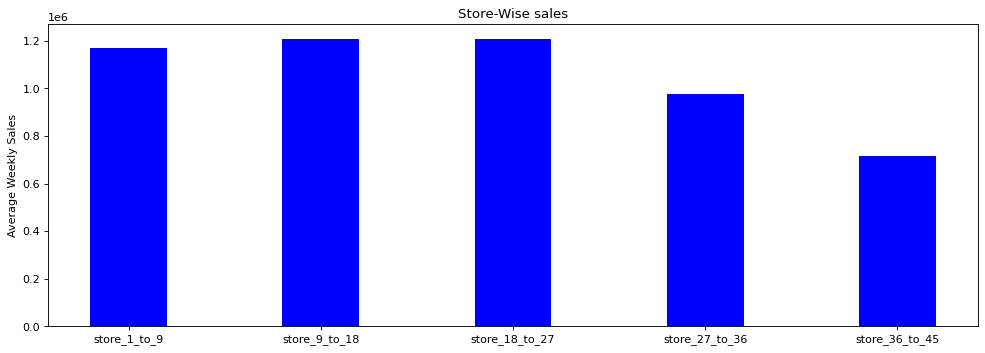

In [19]:
store_1_to_9=[]
for i in range(1,9):
    mean_value_1to9=0
    mean_value_1to9=df[df['Store']==i]['Weekly_Sales'].mean()
    store_1_to_9.append(mean_value_1to9)
store_9_to_18=[]
for i in range(9,18):
    mean_value_9to18=0
    mean_value_9to18=df[df['Store']==i]['Weekly_Sales'].mean()
    store_9_to_18.append(mean_value_9to18)
store_18_to_27=[]
for i in range(18,27):
    mean_value_18to27=0
    mean_value_18to27=df[df['Store']==i]['Weekly_Sales'].mean()
    store_18_to_27.append(mean_value_18to27)
store_27_to_36=[]
for i in range(27,36):
    mean_value_27to36=0
    mean_value_27to36=df[df['Store']==i]['Weekly_Sales'].mean()
    store_27_to_36.append(mean_value_27to36)
store_36_to_45=[]
for i in range(36,45):
    mean_value_36to45=0
    mean_value_36to45=df[df['Store']==i]['Weekly_Sales'].mean()
    store_36_to_45.append(mean_value_36to45)
store_vis={'store_1_to_9':np.mean(store_1_to_9),
           'store_9_to_18':np.mean(store_9_to_18),
           'store_18_to_27':np.mean(store_18_to_27),
           'store_27_to_36':np.mean(store_27_to_36),
           'store_36_to_45':np.mean(store_36_to_45)}
figure(figsize=(15,5), dpi=80)
plt.bar(list(store_vis.keys()), list(store_vis.values()), color ='blue',
        width = 0.4)
plt.ylabel('Average Weekly Sales')
plt.title('Store-Wise sales')
# The stores from 27 to 36 has less sales than rest of the sales
# Thus weekly sales is somewhat dependent on stores, as the store number is between 27 to 45, the sales are less

Text(0.5, 1.0, 'weekly_sales vs Temperature')

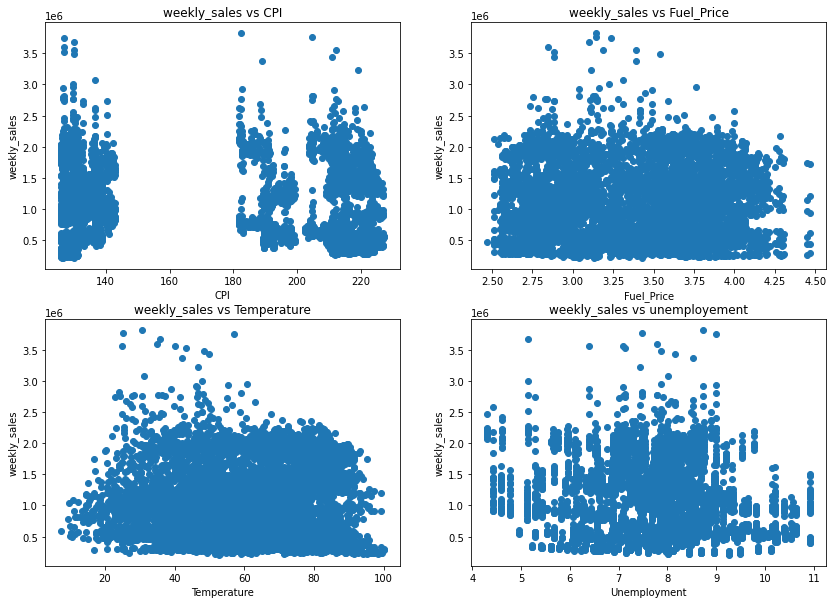

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
axs[1,1].scatter(df[df.columns[-1]],df['Weekly_Sales'])
axs[1,1].set_xlabel('Unemployment')
axs[1,1].set_ylabel('weekly_sales')
axs[1,1].set_title('weekly_sales vs unemployement')
axs[0,0].scatter(df[df.columns[-2]],df['Weekly_Sales'])
axs[0,0].set_xlabel('CPI')
axs[0,0].set_ylabel('weekly_sales')
axs[0,0].set_title('weekly_sales vs CPI')
axs[0,1].scatter(df[df.columns[-3]],df['Weekly_Sales'])
axs[0,1].set_xlabel('Fuel_Price')
axs[0,1].set_ylabel('weekly_sales')
axs[0,1].set_title('weekly_sales vs Fuel_Price')
axs[1,0].scatter(df[df.columns[-4]],df['Weekly_Sales'])
axs[1,0].set_xlabel('Temperature')
axs[1,0].set_ylabel('weekly_sales')
axs[1,0].set_title('weekly_sales vs Temperature')
# NO SIGNIFICANT CORRELATION BETWEEN OTHER VARIABLES AND TEMPERATURE

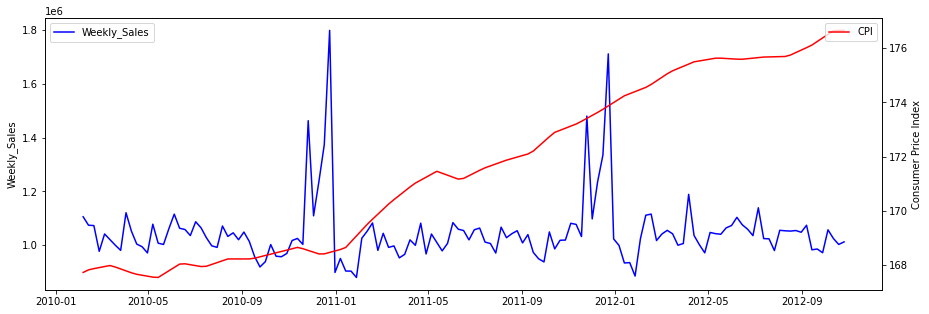

In [21]:
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
ax1.plot(df.groupby('Date').mean()['Weekly_Sales'],color='blue')
ax1.set_ylabel('Weekly_Sales')
ax1.legend(['Weekly_Sales'],loc='upper left')
ax2=ax1.twinx()
ax2.plot(df.groupby('Date').mean()['CPI'],color='red')
ax2.set_ylabel('Consumer Price Index')
ax2.legend(['CPI'],loc='upper right')
## THE CPI  HAS RISEN OVER THE TIME

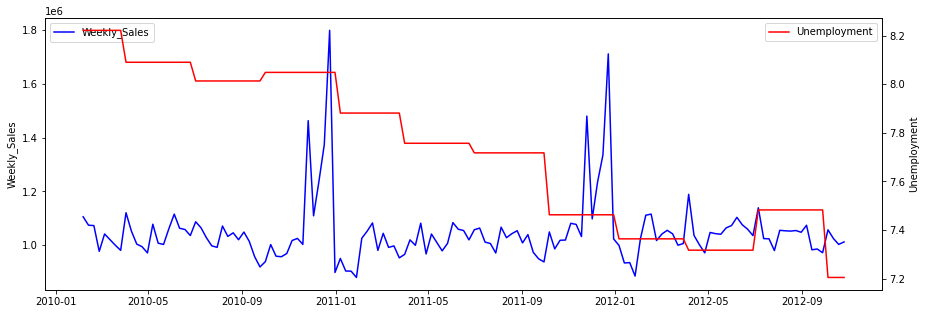

In [22]:
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
ax1.plot(df.groupby('Date').mean()['Weekly_Sales'],color='blue')
ax1.set_ylabel('Weekly_Sales')
ax1.legend(['Weekly_Sales'],loc='upper left')
ax2=ax1.twinx()
ax2.plot(df.groupby('Date').mean()['Unemployment'],color='red')
ax2.set_ylabel('Unemployment')
ax2.legend(['Unemployment'],loc='upper right')
## THE Unemployement  HAS decreased OVER THE TIME 


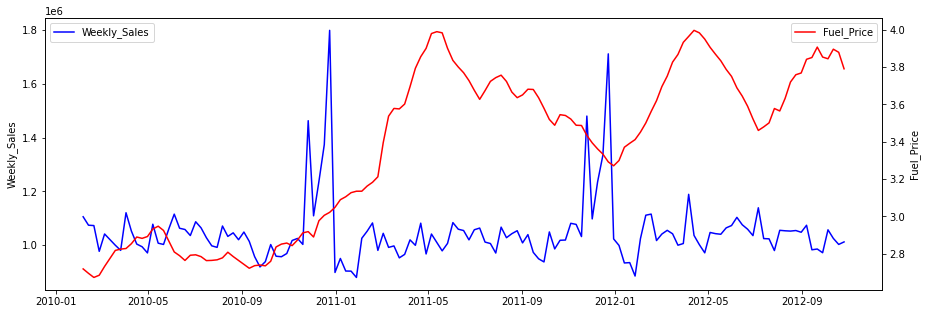

In [23]:
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
ax1.plot(df.groupby('Date').mean()['Weekly_Sales'],color='blue')
ax1.set_ylabel('Weekly_Sales')
ax1.legend(['Weekly_Sales'],loc='upper left')
ax2=ax1.twinx()
ax2.plot(df.groupby('Date').mean()['Fuel_Price'],color='red')
ax2.set_ylabel('Fuel_Price')
ax2.legend(['Fuel_Price'],loc='upper right')

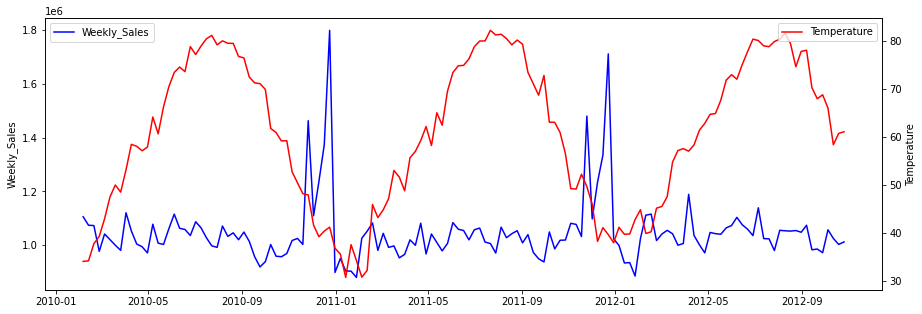

In [24]:
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
ax1.plot(df.groupby('Date').mean()['Weekly_Sales'],color='blue')
ax1.set_ylabel('Weekly_Sales')
ax1.legend(['Weekly_Sales'],loc='upper left')
ax2=ax1.twinx()
ax2.plot(df.groupby('Date').mean()['Temperature'],color='red')
ax2.set_ylabel('Temperature')
ax2.legend(['Temperature'],loc='upper right')

In [25]:
Holidays={'SuperBowl':['2010-02','2011-02','2012-02'],
          'Labour Day':['2010-09','2011-09','2012-09'],
           'ThanksGiving':['2010-11','2011-11'],
           'Christmas':['2010-12','2011-12']}

C:\Users\DELL\AppData\Local\Temp\ipykernel_13272\585293925.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.scatter(df.groupby('Date').mean()[i].index,df.groupby('Date').mean()[i]['Weekly_Sales'],color='Black',linewidths=5,label='SuperBowl')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13272\585293925.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.scatter(df.groupby('Date').mean()[i].index,df.groupby('Date').mean()[i]['Weekly_Sales'],color='Black',linewidths=5,label='SuperBowl')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13272\585293925.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the ro

Text(0.5, 0, 'Time')

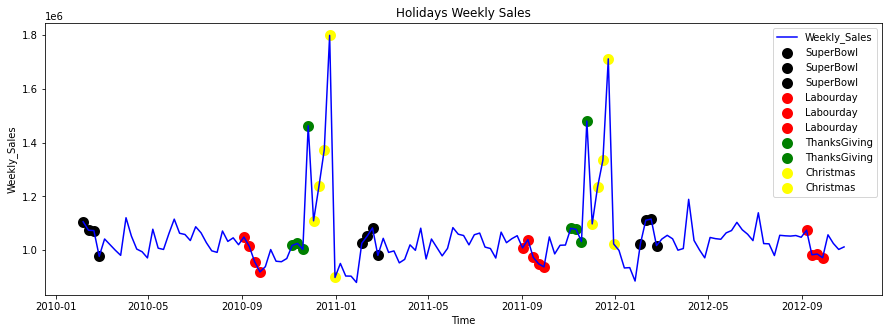

In [26]:
fig, ax1 = plt.subplots(1,1, figsize=(15,5))
ax1.plot(df.groupby('Date').mean()['Weekly_Sales'],color='blue',label='Weekly_Sales')
ax1.set_ylabel('Weekly_Sales')
for i in Holidays['SuperBowl']:
    ax1.scatter(df.groupby('Date').mean()[i].index,df.groupby('Date').mean()[i]['Weekly_Sales'],color='Black',linewidths=5,label='SuperBowl')
for i in Holidays['Labour Day']:
    ax1.scatter(df.groupby('Date').mean()[i].index,df.groupby('Date').mean()[i]['Weekly_Sales'],color='Red',linewidths=5,label='Labourday')
for i in Holidays['ThanksGiving']:
    ax1.scatter(df.groupby('Date').mean()[i].index,df.groupby('Date').mean()[i]['Weekly_Sales'],color='Green',linewidths=5,label='ThanksGiving')
for i in Holidays['Christmas']:
    ax1.scatter(df.groupby('Date').mean()[i].index,df.groupby('Date').mean()[i]['Weekly_Sales'],color='Yellow',linewidths=5,label='Christmas')
ax1.legend()
ax1.set_title('Holidays Weekly Sales')
ax1.set_xlabel('Time')

In [27]:
## THANKSGIVING AND CHRISTMAS ARE THE TWO MAJOR HOLIDAYS WHERE REVENUE SALES IS VERY MUCH HIGHER FOR WALMART
# THE NOVEMBER AND DECEMBER MONTH ARE THE MOST PROFITABLE MONTHS FOR WALMART
# upcoming months after major holiays which is january and february has lowest weekly sales for whole of walmart
# If a particualr week sees high sales because of holiay, the following week after it has lowest sales than the avg sales
# Christmas> tHANKSGIVING> LABOUR DAY> SUPER BOWL IS THE ORDER OF INCREASING WEEKLY SALES

In [28]:
df['Store'] = df.Store.astype('category')
df['Holiday_Flag'] = df.Holiday_Flag.astype('category')
target=df['Weekly_Sales']
df1=df.drop('Weekly_Sales',axis=1)

In [29]:
def create_timefeature(df):
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['day'] = df['Date'].dt.day
    df1=df.drop('Date',axis=1)
    return df1

In [30]:
s=create_timefeature(df1)
s.head()


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter,month,dayofyear,day
0,1,0,42.31,2.572,211.096358,8.106,1,2,36,5
1,1,1,38.51,2.548,211.242170,8.106,1,2,43,12
2,1,0,39.93,2.514,211.289143,8.106,1,2,50,19
3,1,0,46.63,2.561,211.319643,8.106,1,2,57,26
4,1,0,46.50,2.625,211.350143,8.106,1,3,64,5


In [31]:
for i in s.columns:
    a,b=scipy.stats.pearsonr(target,s[i])
    print(i,'-' ,a,' is correlation and ', b, ' is p-value')

Store - -0.33533201479281577  is correlation and  6.883078341514464e-169  is p-value
Holiday_Flag - 0.0368909680104145  is correlation and  0.00307869926384778  is p-value
Temperature - -0.06396270832132275  is correlation and  2.817671641228444e-07  is p-value
Fuel_Price - 0.009463786314475135  is correlation and  0.44782874895250047  is p-value
CPI - -0.07263416204017627  is correlation and  5.438292612224682e-09  is p-value
Unemployment - -0.07360541667398261  is correlation and  3.3924324689728825e-09  is p-value
quarter - 0.06336274735182257  is correlation and  3.6379873623058575e-07  is p-value
month - 0.0761433197923658  is correlation and  9.607838869320523e-10  is p-value
dayofyear - 0.07424819039630857  is correlation and  2.4742174621518463e-09  is p-value
day - -0.017409461859021893  is correlation and  0.16259570379093236  is p-value


In [32]:
s1=pd.get_dummies(s,drop_first=True)
s1[s1.columns[:]]

,Temperature,Fuel_Price,CPI,Unemployment,quarter,month,dayofyear,day,Store_2,Store_3,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,42.31,2.572,211.096358,8.106,1,2,36,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,1,2,43,12,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39.93,2.514,211.289143,8.106,1,2,50,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,1,2,57,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,1,3,64,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,64.88,3.997,192.013558,8.684,3,9,272,28,0,0,...,0,0,0,0,0,0,0,0,1,0
6431,64.89,3.985,192.170412,8.667,4,10,279,5,0,0,...,0,0,0,0,0,0,0,0,1,0
6432,54.47,4.000,192.327265,8.667,4,10,286,12,0,0,...,0,0,0,0,0,0,0,0,1,0
6433,56.47,3.969,192.330854,8.667,4,10,293,19,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(s1[s1.columns[:]], target, test_size=0.2, random_state=42)

In [152]:
# LINEAR REGRESSION
dic={'std scaler':StandardScaler(),'min-max scaler':MinMaxScaler()}
for i in dic.values():
    pipeline=make_pipeline( i,LinearRegression())
    pipeline.fit(X_train,y_train)
    print(f'Score of model with {i} is ',round(r2_score(y_test,pipeline.predict(X_test)),4))
pipeline=make_pipeline( StandardScaler(),LinearRegression())
pipeline.fit(X_train,y_train)
print(f'MSE:' ,mean_squared_error(y_test,pipeline.predict(X_test)))
print(f'MAE:' ,mean_absolute_error(y_test,pipeline.predict(X_test)))

Score of model with StandardScaler() is  0.9268
Score of model with MinMaxScaler() is  0.9268
MSE: 23595045318.2491
MAE: 95065.02634132691


In [149]:
# RIDGE REGRESSION
pipeline=make_pipeline(StandardScaler(),Ridge(solver='auto'))
parameters = {'ridge__alpha':[0.01,0.1,1,5, 10]}
clf = GridSearchCV(pipeline,parameters,cv=10,scoring='r2',refit=True)
clf.fit(X_train,y_train)
print('best params is',clf.best_params_)
print(f'Score of model  is ',round(r2_score(y_test,clf.predict(X_test)),4))
print(f'MSE:' ,mean_squared_error(y_test,clf.predict(X_test)))
print(f'MAE:' ,mean_absolute_error(y_test,clf.predict(X_test)))

best params is {'ridge__alpha': 0.01}
Score of model  is  0.9268
MSE: 23590270790.97176
MAE: 95037.3845801248


In [154]:
# Lasso REGRESSION
pipeline_lasso=make_pipeline(StandardScaler(),Lasso(tol=0.01))
parameters = {'lasso__alpha':[0.01,0.1,1,5,10]}
clf_lasso = GridSearchCV(pipeline_lasso,parameters,cv=5,scoring='r2',refit=True)
clf_lasso.fit(X_train,y_train)
print(clf_lasso.best_params_)
print(f'Score of model  is ',round(r2_score(y_test,clf_lasso.predict(X_test)),4))
print(f'MSE:' ,mean_squared_error(y_test,clf_lasso.predict(X_test)))
print(f'MAE:' ,mean_absolute_error(y_test,clf_lasso.predict(X_test)))

C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46290956330379.96, tolerance: 13152335229664.707
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48151380847612.53, tolerance: 13243472542495.36
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45923074845688.52, tolerance: 12934363568860.764
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\sklearn\linear_m

{'lasso__alpha': 0.01}
Score of model  is  0.9266
MSE: 23649231580.556896
MAE: 95131.5767201892


C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58610293476701.55, tolerance: 16345786441610.594
  model = cd_fast.enet_coordinate_descent(


In [156]:
# TRYING WEIGHTED AVGERAGE OF DIFFERENT REGRESSION PREDICTIONS
lr_pred=pipeline.predict(X_test)
ridge_pred=clf.predict(X_test)
lasso_pred=clf_lasso.predict(X_test)
pred=0.3*ridge_pred+0.3*lasso_pred+0.4*lr_pred
print(f'Score of weighted model  is ',round(r2_score(y_test,pred),4))
print(f'MSE:' ,mean_squared_error(y_test,pred))
print(f'MAE:' ,mean_absolute_error(y_test,pred))

Score of weighted model  is  0.9268
MSE: 23588259552.2925
MAE: 94989.11992608628


In [105]:
pipeline_lasso.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])